In [1]:
# Install matplotlib
!pip3 install matplotlib


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [2]:
# Import YALIES_API_KEY from .env
import os
import requests
YALIES_API_KEY = os.getenv("YALIES_API_KEY")
# Make a fetch request to https://yalies.io/api/people with the YALIES_API_KEY
res = requests.post("https://yalies.io/api/people", headers={"Authorization": f"Bearer {YALIES_API_KEY}"})
# Get the data from the response
data = res.json()

In [4]:
import pandas as pd
# Create a DataFrame from the data
df = pd.DataFrame(data)

In [20]:
# Types of majors
majors = df["major"].unique()
majors

array([None, 'Economics', 'Mathematics & Philosophy', 'Neuroscience',
       'Psychology', 'Undeclared', 'Political Science',
       'Electrical Engineering & Computer Science',
       'History of Science, Medicine, & Public Health',
       'Molecular, Cellular, & Developmental Biology',
       'Ethnicity, Race, & Migration', 'Electrical Engineering',
       'Ecology & Evolutionary Biology', 'Computer Science',
       'Computer Science & Economics', 'Cognitive Science',
       'Computer Science & Mathematics', 'Classical Civilization',
       'Molecular Biophysics & Biochemistry', 'Music (Int.)',
       'Molecular, Cellular, & Developmental Biology (Int.)', 'History',
       'English', 'Astrophysics', 'Computing and the Arts',
       'Mechanical Engineering', 'Chemistry',
       "Women's, Gender, & Sexuality Studies", 'Biomedical Engineering',
       'Global Affairs', 'Anthropology', 'Comparative Literature',
       'Music', 'Urban Studies', 'Sociology (Int.)', 'Mathematics (Int.)',
  

In [15]:
# Find the number of people in each college
college_counts = df["college"].value_counts()
college_counts

Pauli Murray         546
Benjamin Franklin    534
Saybrook             530
Davenport            527
Pierson              524
Silliman             520
Branford             486
Ezra Stiles          485
Morse                477
Trumbull             471
Grace Hopper         467
Timothy Dwight       457
Berkeley             454
Jonathan Edwards     437
Name: college, dtype: int64

In [16]:
# Sum the number of people in each college
college_counts.sum()

6915

In [43]:

for major in majors:
# 	# Create a pie chart for each major for the college breakdown
	value_counts = df[df["major"] == major]["college"].value_counts()
	pie = value_counts.plot.pie(title=major, autopct="%.2f%%")
	# Print the pie chart
	pie.figure.savefig(f"Number/{major}.png")
	# Close the pie chart
	pie.figure.clf()


<Figure size 640x480 with 0 Axes>

In [33]:
# Economics major college breakdown
value_counts = df[df["major"] == "Economics"]["college"].value_counts()
value_counts


Ezra Stiles          36
Benjamin Franklin    32
Saybrook             32
Grace Hopper         27
Pauli Murray         26
Branford             24
Berkeley             24
Trumbull             23
Davenport            23
Morse                23
Silliman             23
Jonathan Edwards     21
Pierson              19
Timothy Dwight       17
Name: college, dtype: int64

<AxesSubplot: title={'center': 'Economics'}, ylabel='college'>

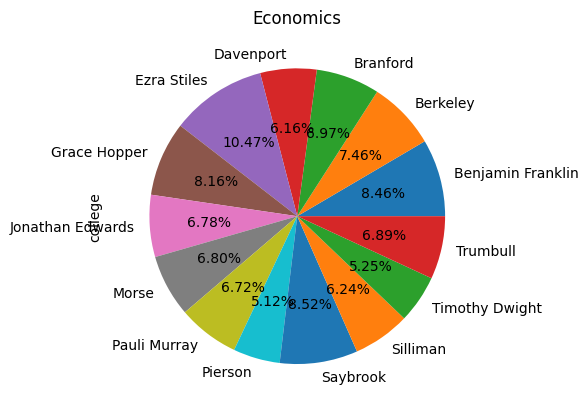

In [41]:

# Divide the number of people in each college by the total number of people in that college
# college_counts = df["college"].value_counts()
# new_counts = value_counts / college_counts
# new_counts

value_counts = df[df["major"] == "Economics"]["college"].value_counts()
college_counts = df["college"].value_counts()
# Get the percentages of each college
percentages = value_counts / college_counts
percentages
pie = percentages.plot.pie(title="Economics", autopct="%.2f%%")
pie


In [44]:

for major in majors:
	try:
# 	# Create a pie chart for each major for the college breakdown
		value_counts = df[df["major"] == major]["college"].value_counts()
		college_counts = df["college"].value_counts()
		# Get the percentages of each college
		percentages = value_counts / college_counts
		pie = percentages.plot.pie(title=major, autopct="%.2f%%")
		# Print the pie chart
		pie.figure.savefig(f"Percentages/{major}.png")
		# Close the pie chart
		pie.figure.clf()
	except:
		pass

/usr/local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:3154: RuntimeWarning: invalid value encountered in divide
  x = x / sx
posx and posy should be finite values


<Figure size 640x480 with 0 Axes>